# 引言
# 预备知识

# 线性神经网络

在介绍深度神经网络之前，我们需要了解神经网络训练的基础知识。
本章我们将介绍神经网络的整个训练过程，
包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型。
为了更容易学习，我们将从经典算法————*线性*神经网络开始，介绍神经网络的基础知识。
经典统计学习技术中的线性回归和softmax回归可以视为线性神经网络，
这些知识将为本书其他部分中更复杂的技术奠定基础。

## 线性回归

*回归*（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。
在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与*预测*（prediction）有关。
当我们想预测一个数值时，就会涉及到回归问题。
常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、
预测需求（零售销量等）。
但不是所有的*预测*都是回归问题。
在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。

### 线性回归的基本元素

*线性回归*（linear regression）可以追溯到19世纪初，
它在回归的各种标准工具中最简单而且最流行。
线性回归基于几个简单的假设：
首先，<font color="red">假设自变量$\mathbf{x}$和因变量$y$之间的关系是线性的，
即$y$可以表示为$\mathbf{x}$中元素的<u>*加权和*</u></font>，这里通常允许包含观测值的一些噪声；
其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释*线性回归*，我们举一个实际的例子：
我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。
为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。
这个数据集包括了房屋的销售价格、面积和房龄。
在机器学习的术语中，该数据集称为<font color="red">*训练数据集*（training data set）
或*训练集*（training set）。
每行数据</font>（比如一次房屋交易相对应的数据）<font color="red">称为*样本*（sample），
也可以称为*数据点*（data point）或*数据样本*（data instance）</font>。
我们把试图<font color="red">预测的目标</font>（比如预测房屋价格）<font color="red">称为*标签*（label）或*目标*（target）。
预测所依据的自变量</font>（面积和房龄）<font color="red">称为*特征*（feature）或*协变量*（covariate）。</font>

通常，我们使用$n$来表示数据集中的样本数。
对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，
其对应的标签是$y^{(i)}$。

#### 线性模型

线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：

<span id='eq.3.1.1'></span>
$$\tag{3.1.1}
\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

[(3.1.1)](#eq.3.1.1)中的$w_{\mathrm{area}}$和$w_{\mathrm{age}}$
称为*权重*（weight），权重决定了每个特征对我们预测值的影响。
$b$称为<font color="red">*偏置*（bias）、*偏移量*（offset）或*截距*（intercept）</font>。
偏置是指当所有特征都取值为0时，预测值应该为多少。
即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。
如果没有偏置项，我们模型的表达能力将受到限制。
严格来说，[(3.1.1)](#eq.3.1.1)是输入特征的一个
<font color="red">*仿射变换*（affine transformation）。
仿射变换的特点是通过加权和对特征进行*线性变换*（linear transformation），
并通过偏置项来进行*平移*（translation）</font>。

给定一个数据集，我们的目标是寻找模型的权重$\mathbf{w}$和偏置$b$，
使得根据模型做出的预测大体符合数据里的真实价格。
输出的预测值由输入特征通过*线性模型*的仿射变换决定，仿射变换由所选权重和偏置确定。

而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。
当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$
（通常使用“尖角”符号表示$y$的估计值）表示为：

<span id='eq.3.1.2'></span>
$$\tag{3.1.2}
\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，
并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，
我们可以用点积形式来简洁地表达模型：

<span id='eq.3.1.3'></span>
$$\tag{3.1.3}
\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

在 [(3.1.3)](#eq.3.1.3)中，
向量$\mathbf{x}$对应于单个数据样本的特征。
用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
可以很方便地引用我们整个数据集的$n$个样本。
其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。

对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$
可以通过矩阵-向量乘法表示为：

<span id='eq.3.1.4'></span>
$$\tag{3.1.4}
{\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

这个过程中的求和将使用广播机制
（广播机制在 [2.1.3节](./02.preliminaries.ipynb/#广播机制)中有详细介绍）。
给定训练数据特征$\mathbf{X}$和对应的已知标签$\mathbf{y}$，
线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$：
当给定从$\mathbf{X}$的同分布中取样的新样本特征时，
这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。

虽然我们相信给定$\mathbf{x}$预测$y$的最佳模型会是线性的，
但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1 \leq i \leq n$，$y^{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)}+b$。
无论我们使用什么手段来观察特征$\mathbf{X}$和标签$\mathbf{y}$，
都可能会出现少量的观测误差。
因此，即使确信特征与标签的潜在关系是线性的，
我们也会加入一个噪声项来考虑观测误差带来的影响。

在开始寻找最好的*模型参数*（model parameters）$\mathbf{w}$和$b$之前，
我们还需要两个东西：
（1）一种模型质量的度量方式；
（2）一种能够更新模型以提高模型预测质量的方法。

#### 损失函数

在我们开始考虑如何用模型*拟合*（fit）数据之前，我们需要确定一个拟合程度的度量。
*损失函数*（loss function）能够量化目标的*实际*值与*预测*值之间的差距。
通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。
回归问题中最常用的损失函数是平方误差函数。
当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

<span id='eq.3.1.5'></span>
$$\tag{3.1.5}
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些
（因为当我们对损失函数求导后常数系数为1）。
由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。
为了进一步说明，来看下面的例子。
我们为一维情况下的回归问题绘制图像，如[图3.1.1](#fig.3.1.1)所示。

<span id='fig.3.1.1'></span>
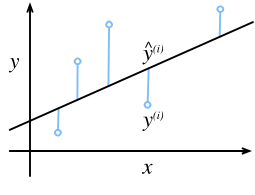
图3.1.1 用线性模型拟合数据

由于平方误差函数中的二次方项，
估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。
为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

<span id='eq.3.1.6'></span>
$$\tag{3.1.6}
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），
这组参数能最小化在所有训练样本上的总损失。如下式：

<span id='eq.3.1.7'></span>
$$\tag{3.1.7}
\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

#### 解析解

线性回归刚好是一个很简单的优化问题。
与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来，
这类解叫作解析解（analytical solution）。
首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。
我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。
这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。
将损失关于$\mathbf{w}$的导数设为0，得到解析解：

<span id='eq.3.1.8'></span>
$$\tag{3.1.8}
\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。
解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

#### 随机梯度下降

即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。
在许多任务上，那些难以优化的模型效果要更好。
因此，弄清楚如何训练这些难以优化的模型是非常重要的。

本书中我们用到一种名为*梯度下降*（gradient descent）的方法，
这种方法几乎可以优化所有深度学习模型。
它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）
关于模型参数的导数（在这里也可以称为梯度）。
但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。
因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，
这种变体叫做*小批量随机梯度下降*（minibatch stochastic gradient descent）。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，
它是由固定数量的训练样本组成的。
然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。
最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

<span id='eq.3.1.9'></span>
$$\tag{3.1.9}
(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下：
（1）初始化模型参数的值，如随机初始化；
（2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。
对于平方损失和仿射变换，我们可以明确地写成如下形式:

<span id='eq.3.1.10'></span>
$$\tag{3.1.10}
\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$

公式[(3.1.10)](#eq.3.1.10)中的$\mathbf{w}$和$\mathbf{x}$都是向量。
在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。
$|\mathcal{B}|$表示每个小批量中的样本数，这也称为*批量大小*（batch size）。
$\eta$表示*学习率*（learning rate）。
批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。
这些可以调整但不在训练过程中更新的参数称为*超参数*（hyperparameter）。
*调参*（hyperparameter tuning）是选择超参数的过程。
超参数通常是我们根据训练迭代结果来调整的，
而训练迭代结果是在独立的*验证数据集*（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），
我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。
但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。
因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。
但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。
深度学习实践者很少会去花费大力气寻找这样一组参数，使得在*训练集*上的损失达到最小。
事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，
这一挑战被称为*泛化*（generalization）。

#### 用模型进行预测

给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，
现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。
<font color="red">给定特征估计目标的过程通常称为*预测*（prediction）或*推断*（inference）。</font>

本书将尝试坚持使用*预测*这个词。
虽然*推断*这个词已经成为深度学习的标准术语，但其实*推断*这个词有些用词不当。
在统计学中，*推断*更多地表示基于数据集估计参数。
当深度学习从业者与统计学家交谈时，术语的误用经常导致一些误解。

### 矢量化加速

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。
为了实现这一点，需要我们对计算进行矢量化，
从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [ ]:
import math
import time
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。
我们实例化两个全为1的10000维向量。
在一种方法中，我们将使用Python的for循环遍历向量；
在另一种方法中，我们将依赖对`+`的调用。

In [ ]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

由于在本书中我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [ ]:
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。

首先，我们使用for循环，每次执行一位的加法。

In [ ]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

或者，我们使用重载的`+`运算符来计算按元素的和。

In [ ]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

结果很明显，第二种方法比第一种方法快得多。
<font color="red">**矢量化代码通常会带来数量级的加速**</font>。
另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

### 正态分布与平方损失

接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。
正态分布（normal distribution），也称为*高斯分布*（Gaussian distribution），
最早由德国数学家高斯（Gauss）应用于天文学研究。
简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

<span id='eq.3.1.11'></span>
$$\tag{3.1.11}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

下面我们定义一个Python函数来计算正态分布。

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

我们现在可视化正态分布。

In [ ]:
def set_figsize(figsize=(4, 3)):
    """Set the figure size for matplotlib."""
    backend_inline.set_matplotlib_formats('svg')
    """Set the figure size for matplotlib."""
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib.

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points.

    Defined in :numref:`sec_calculus`"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)
# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
     ylabel='p(x)', figsize=(4.5, 2.5),
     legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [ ]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
for mu, sigma in params:
    ax.plot(x, normal(x, mu, sigma), label="mean "+str(mu)+", std "+str(sigma))
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.grid(True)
ax.legend(loc='upper left')

就像我们所看到的，改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是：
我们假设了观测中包含噪声，其中噪声服从正态分布。
噪声正态分布如下式:

<span id='eq.3.1.12'></span>
$$\tag{3.1.12}
y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$

其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。

因此，我们现在可以写出通过给定的$\mathbf{x}$观测到特定$y$的*似然*（likelihood）：

<span id='eq.3.1.13'></span>
$$\tag{3.1.13}
P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的*似然*最大的值：

<span id='eq.3.1.14'></span>
$$\tag{3.1.14}
P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

根据极大似然估计法选择的估计量称为*极大似然估计量*。
虽然使许多指数函数的乘积最大化看起来很困难，
但是我们可以在不改变目标的前提下，通过最大化似然对数来简化。
由于历史原因，优化通常是说最小化而不是最大化。
我们可以改为*最小化负对数似然*$-\log P(\mathbf y \mid \mathbf X)$。
由此可以得到的数学公式是：

<span id='eq.3.1.15'></span>
$$\tag{3.1.15}
-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项，
因为第一项不依赖于$\mathbf{w}$和$b$。
现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。
幸运的是，上面式子的解并不依赖于$\sigma$。
因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

> Note:  
令第$i$个样本的输入为$x^{(i)}$, 输出为$\hat{y}^{(i)}$，label为$y^{(i)}$, 损失函数loss:  
$$l^{(i)}(\mathbf{w}, b) = \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$
$n$个样本的损失函数: 
$$\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) = \sum_{i=1}^n \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2$$
假设$y^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \sigma^2)$
$\begin{array}{r,c,l}
P(y^{(i)} \mid \mathbf{x}^{(i)}) & = & \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (\epsilon-0)^2\right) \\ 
& = & \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)})^2\right)
\end{array}$
$\begin{array}{r,c,l}
P(\mathbf y \mid \mathbf X) & = & \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}) \\
\implies -\log P(\mathbf y \mid \mathbf X)
& = & \sum_{i=1}^n \left[ \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2 \right] \\
& \propto & \sum_{i=1}^n \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2
\end{array}$



### 从线性回归到深度网络

到目前为止，我们只谈论了线性模型。
尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型，
从而把线性模型看作一个神经网络。
首先，我们用“层”符号来重写这个模型。

#### 神经网络图

深度学习从业者喜欢绘制图表来可视化模型中正在发生的事情。
在[图3.1.2](#fig.3.1.2)中，我们将线性回归模型描述为一个神经网络。
需要注意的是，该图只显示连接模式，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。

<span id='fig.3.1.2'></span>
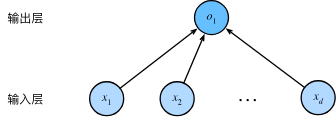
图3.1.2 线性回归是一个单层神经网络

在[图3.1.2](#fig.3.1.2)所示的神经网络中，输入为$x_1, \ldots, x_d$，
因此<font color="red">输入层中的*输入数*（或称为*特征维度*，feature dimensionality）</font>为$d$。
网络的输出为$o_1$，因此输出层中的*输出数*是1。
需要注意的是，输入值都是已经给定的，并且只有一个*计算*神经元。
由于模型重点在发生计算的地方，所以通常我们在计算层数时不考虑输入层。
也就是说，[图3.1.2](#fig.3.1.2)中神经网络的*层数*为1。
我们可以将线性回归模型视为仅由单个人工神经元组成的神经网络，或称为单层神经网络。

对于线性回归，每个输入都与每个输出（在本例中只有一个输出）相连，
我们将这种变换（[图3.1.2](#fig.3.1.2)中的输出层）
称为*全连接层*（fully-connected layer）或称为*稠密层*（dense layer）。
下一章将详细讨论由这些层组成的网络。

#### 生物学

线性回归发明的时间（1795年）早于计算神经科学，所以将线性回归描述为神经网络似乎不合适。
当控制学家、神经生物学家沃伦·麦库洛奇和沃尔特·皮茨开始开发人工神经元模型时，
他们为什么将线性模型作为一个起点呢？
我们来看一张图片[图3.1.3](#fig.3.1.3)：
这是一张由*树突*（dendrites，输入终端）、
*细胞核*（nucleus，CPU）组成的生物神经元图片。
*轴突*（axon，输出线）和*轴突端子*（axon terminal，输出端子）
通过*突触*（synapse）与其他神经元连接。

<span id='fig.3.1.3'></span>
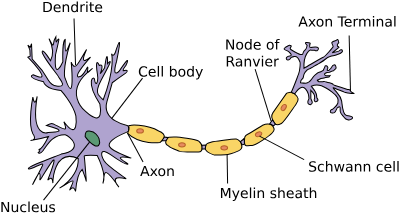
图3.1.3 真实的神经元

树突中接收到来自其他神经元（或视网膜等环境传感器）的信息$x_i$。
该信息通过*突触权重*$w_i$来加权，以确定输入的影响（即，通过$x_i w_i$相乘来激活或抑制）。
来自多个源的加权输入以加权和$y = \sum_i x_i w_i + b$的形式汇聚在细胞核中，
然后将这些信息发送到轴突$y$中进一步处理，通常会通过$\sigma(y)$进行一些非线性处理。
之后，它要么到达目的地（例如肌肉），要么通过树突进入另一个神经元。

当然，许多这样的单元可以通过正确连接和正确的学习算法拼凑在一起，
从而产生的行为会比单独一个神经元所产生的行为更有趣、更复杂，
这种想法归功于我们对真实生物神经系统的研究。

当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感。
我们援引斯图尔特·罗素和彼得·诺维格在他们的经典人工智能教科书
*Artificial Intelligence:A Modern Approach* ([Russell and Norvig, 2016](#paper.Russell.2016)) 中所说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。
同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。
> - <span id='paper.Russell.2016'></span>
Russell, S. J., & Norvig, P. (2016). Artificial intelligence: a modern approach. Malaysia; Pearson Education Limited,.

### 小结

* 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
* 矢量化使数学表达上更简洁，同时运行的更快。
* 最小化目标函数和执行极大似然估计等价。
* 线性回归模型也是一个简单的神经网络。

## 线性回归的从零开始实现

在了解线性回归的关键思想之后，我们可以开始通过代码来动手实现线性回归了。
在这一节中，(**我们将从零开始实现整个方法，
包括数据流水线、模型、损失函数和小批量随机梯度下降优化器**)。
虽然现代的深度学习框架几乎可以自动化地进行所有这些工作，但从零开始实现可以确保我们真正知道自己在做什么。
同时，了解更细致的工作原理将方便我们自定义模型、自定义层或自定义损失函数。
在这一节中，我们将只使用张量和自动求导。
在之后的章节中，我们会充分利用深度学习框架的优势，介绍更简洁的实现方式。

In [ ]:
import random
import torch
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

### 生成数据集

为了简单起见，我们将[**根据带有噪声的线性模型构造一个人造数据集。**]
我们的任务是使用这个有限样本的数据集来恢复这个模型的参数。
我们将使用低维数据，这样可以很容易地将其可视化。
在下面的代码中，我们生成一个包含1000个样本的数据集，
每个样本包含从标准正态分布中采样的2个特征。
我们的合成数据集是一个矩阵$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$。

我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

<span id='eq.3.2.1'></span>
$$\tag{3.2.1}
\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$

$\epsilon$可以视为模型预测和标签时的潜在观测误差。
在这里我们认为标准假设成立，即$\epsilon$服从均值为0的正态分布。
为了简化问题，我们将标准差设为0.01。
下面的代码生成合成数据集。

In [ ]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

注意，[**`features`中的每一行都包含一个二维数据样本，
`labels`中的每一行都包含一维标签值（一个标量）**]。

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

通过生成第二个特征`features[:, 1]`和`labels`的散点图，
可以直观观察到两者之间的线性关系。

In [ ]:
def set_figsize(figsize=(4, 3)):
    """Set the figure size for matplotlib."""
    backend_inline.set_matplotlib_formats('svg')
    """Set the figure size for matplotlib."""
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

### 读取数据集

回想一下，训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新我们的模型。
由于这个过程是训练机器学习算法的基础，所以有必要定义一个函数，
该函数能打乱数据集中的样本并以小批量方式获取数据。

在下面的代码中，我们定义一个`data_iter`函数，
该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量。
每个小批量包含一组特征和标签。

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

通常，我们利用GPU并行运算的优势，处理合理大小的“小批量”。
每个样本都可以并行地进行模型计算，且每个样本损失函数的梯度也可以被并行计算。
GPU可以在处理几百个样本时，所花费的时间不比处理一个样本时多太多。

我们直观感受一下小批量运算：读取第一个小批量数据样本并打印。
每个批量的特征维度显示批量大小和输入特征数。
同样的，批量的标签形状与`batch_size`相等。

In [ ]:
#@tab all
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。
上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。
例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。
<font color="red">**在深度学习框架中实现的内置迭代器效率要高得多**</font>，
它可以处理存储在文件中的数据和数据流提供的数据。

### 初始化模型参数

在我们开始用小批量随机梯度下降优化我们的模型参数之前，
我们需要先有一些参数。
在下面的代码中，我们通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重，
并将偏置初始化为0。

In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

在初始化参数之后，我们的任务是更新这些参数，直到这些参数足够拟合我们的数据。
每次更新都需要计算损失函数关于模型参数的梯度。
有了这个梯度，我们就可以向减小损失的方向更新每个参数。
因为手动计算梯度很枯燥而且容易出错，所以没有人会手动计算梯度。
我们使用[2.5节](02.preliminaries.ipynb#自动微分)中引入的自动微分来计算梯度。

### 定义模型

接下来，我们必须定义模型，将模型的输入和参数同模型的输出关联起来。
回想一下，要计算线性模型的输出，
我们只需计算输入特征$\mathbf{X}$和模型权重$\mathbf{w}$的矩阵-向量乘法后加上偏置$b$。
注意，上面的$\mathbf{Xw}$是一个向量，而$b$是一个标量。
回想一下[2.1.3节](02.preliminaries.ipynb#广播机制)中描述的广播机制：
当我们用一个向量加一个标量时，标量会被加到向量的每个分量上。

In [ ]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 定义损失函数

因为需要计算损失函数的梯度，所以我们应该先定义损失函数。
这里我们使用[3.1节](#线性回归)中描述的平方损失函数。
在实现中，我们需要将真实值`y`的形状转换为和预测值`y_hat`的形状相同。

In [ ]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

正如我们在[3.1节](#线性回归)中讨论的，线性回归有解析解。
尽管线性回归有解析解，但本书中的其他模型却没有。
这里我们介绍小批量随机梯度下降。

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。
接下来，朝着减少损失的方向更新我们的参数。
下面的函数实现小批量随机梯度下降更新。
该函数接受模型参数集合、学习速率和批量大小作为输入。每
一步更新的大小由学习速率`lr`决定。
因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（`batch_size`）
来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [ ]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练

现在我们已经准备好了模型训练所有需要的要素，可以实现主要的训练过程部分了。
理解这段代码至关重要，因为从事深度学习后，
相同的训练过程几乎一遍又一遍地出现。
<font color="red">在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。
计算完损失后，我们开始反向传播，存储每个参数的梯度。
最后，我们调用优化算法`sgd`来更新模型参数</font>。

概括一下，我们将执行以下**循环**：

* 初始化参数
* 重复以下训练，直到完成
    * 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

在每个*迭代周期*（epoch）中，我们使用`data_iter`函数遍历整个数据集，
并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。
这里的迭代周期个数`num_epochs`和学习率`lr`都是超参数，分别设为3和0.03。
设置超参数很棘手，需要通过反复试验进行调整。
我们现在忽略这些细节，以后会在[11节](./11.optimization.ipynb)中详细介绍。

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

因为我们使用的是自己合成的数据集，所以我们知道真正的参数是什么。
因此，我们可以通过比较真实参数和通过训练学到的参数来评估训练的成功程度。
事实上，真实参数和通过训练学到的参数确实非常接近。

In [ ]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

注意，我们不应该想当然地认为我们能够完美地求解参数。
在机器学习中，我们通常不太关心恢复真正的参数，而更关心如何高度准确预测参数。
幸运的是，即使是在复杂的优化问题上，随机梯度下降通常也能找到非常好的解。
其中一个原因是，在深度网络中存在许多参数组合能够实现高度精确的预测。

### 小结

* 我们学习了深度网络是如何实现和优化的。在这一过程中只使用张量和自动微分，不需要定义层或复杂的优化器。
* 这一节只触及到了表面知识。在下面的部分中，我们将基于刚刚介绍的概念描述其他模型，并学习如何更简洁地实现其他模型。

## 线性回归的简洁实现
refer to: https://zh.d2l.ai/chapter_linear-networks/linear-regression-concise.html

在过去的几年里，出于对深度学习强烈的兴趣，
许多公司、学者和业余爱好者开发了各种成熟的开源框架。
这些框架可以自动化基于梯度的学习算法中重复性的工作。
在[3.2节](#线性回归的从零开始实现)中，我们只运用了：
（1）通过张量来进行数据存储和线性代数；
（2）通过自动微分来计算梯度。
实际上，由于数据迭代器、损失函数、优化器和神经网络层很常用，
现代深度学习库也为我们实现了这些组件。

本节将介绍如何通过使用深度学习框架来简洁地实现
[3.2节](#线性回归的从零开始实现)中的线性回归模型。

### 生成数据集

与[3.2节](#线性回归的从零开始实现)中类似，我们首先生成数据集。

In [ ]:
import numpy as np
import torch
from torch.utils import data

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

### 读取数据集

我们可以调用框架中现有的API来读取数据。
我们将`features`和`labels`作为API的参数传递，并通过数据迭代器指定`batch_size`。
此外，<font color="red">布尔值`is_train`表示是否希望数据迭代器对象在每个迭代周期内打乱数据</font>。

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

使用`data_iter`的方式与我们在[3.2节](#线性回归的从零开始实现)中使用`data_iter`函数的方式相同。为了验证是否正常工作，让我们读取并打印第一个小批量样本。
与[3.2节](#线性回归的从零开始实现)不同，这里我们使用`iter`构造Python迭代器，并使用`next`从迭代器中获取第一项。

In [ ]:
next(iter(data_iter))

### 定义模型

当我们在[3.2节](#线性回归的从零开始实现)中实现线性回归时，
我们明确定义了模型参数变量，并编写了计算的代码，这样通过基本的线性代数运算得到输出。
但是，如果模型变得更加复杂，且当我们几乎每天都需要实现模型时，自然会想简化这个过程。
这种情况类似于为自己的博客从零开始编写网页。
做一两次是有益的，但如果每个新博客就需要工程师花一个月的时间重新开始编写网页，那并不高效。

对于标准深度学习模型，我们可以使用框架的预定义好的层。这使我们只需关注使用哪些层来构造模型，而不必关注层的实现细节。
我们首先定义一个模型变量`net`，它是一个`Sequential`类的实例。
`Sequential`类将多个层串联在一起。
当给定输入数据时，`Sequential`实例将数据传入到第一层，
然后将第一层的输出作为第二层的输入，以此类推。
在下面的例子中，我们的模型只包含一个层，因此实际上不需要`Sequential`。
但是由于以后几乎所有的模型都是多层的，在这里使用`Sequential`会让你熟悉“标准的流水线”。

回顾[图3.1.2](#fig.3.1.2)中的单层网络架构，
这一单层被称为*全连接层*（fully-connected layer），
因为它的每一个输入都通过矩阵-向量乘法得到它的每个输出。


在PyTorch中，全连接层在`Linear`类中定义。
值得注意的是，我们将两个参数传递到`nn.Linear`中。
第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1。

In [ ]:
# nn是神经网络的缩写
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

### 初始化模型参数

在使用`net`之前，我们需要初始化模型参数。
如在线性回归模型中的权重和偏置。
深度学习框架通常有预定义的方法来初始化参数。
在这里，我们指定每个权重参数应该从均值为0、标准差为0.01的正态分布中随机采样，
偏置参数将初始化为零。

正如我们在构造`nn.Linear`时指定输入和输出尺寸一样，
现在我们能直接访问参数以设定它们的初始值。
我们通过`net[0]`选择网络中的第一个图层，
然后使用`weight.data`和`bias.data`方法访问参数。
我们还可以使用替换方法`normal_`和`fill_`来重写参数值。

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

### 定义损失函数
计算均方误差使用的是`MSELoss`类，也称为平方$L_2$范数。
默认情况下，它返回所有样本损失的平均值。

In [ ]:
loss = nn.MSELoss()

### 定义优化算法

小批量随机梯度下降算法是一种优化神经网络的标准工具，
PyTorch在`optim`模块中实现了该算法的许多变种。
当我们实例化一个`SGD`实例时，我们要指定优化的参数
（可通过`net.parameters()`从我们的模型中获得）以及优化算法所需的超参数字典。
小批量随机梯度下降只需要设置`lr`值，这里设置为0.03。

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 训练

通过深度学习框架的高级API来实现我们的模型只需要相对较少的代码。
我们不必单独分配参数、不必定义我们的损失函数，也不必手动实现小批量随机梯度下降。
当我们需要更复杂的模型时，高级API的优势将大大增加。
当我们有了所有的基本组件，训练过程代码与我们从零开始实现时所做的非常相似。

回顾一下：在每个迭代周期里，我们将完整遍历一次数据集（`train_data`），
不停地从中获取一个小批量的输入和相应的标签。
对于每一个小批量，我们会进行以下<font color="red">**步骤**</font>:
* 通过调用`net(X)`生成预测并计算损失`l`（前向传播）。
* 通过进行反向传播来计算梯度。
* 通过调用优化器来更新模型参数。

为了更好的衡量训练效果，我们计算每个迭代周期后的损失，并打印它来监控训练过程。

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

下面我们比较生成数据集的真实参数和通过有限数据训练获得的模型参数。
要访问参数，我们首先从`net`访问所需的层，然后读取该层的权重和偏置。
正如在从零开始实现中一样，我们估计得到的参数与生成数据的真实参数非常接近。

In [ ]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

### 小结

* 我们可以使用PyTorch的高级API更简洁地实现模型。
* 在PyTorch中，`data`模块提供了数据处理工具，`nn`模块定义了大量的神经网络层和常见损失函数。
* 我们可以通过`_`结尾的方法将参数替换，从而初始化参数。

## softmax回归

在[3.1节](#线性回归)中我们介绍了线性回归。
随后，在[3.2节](#线性回归的从零开始实现)中我们从头实现线性回归。
然后，在[3.3节](#线性回归的简洁实现)中我们使用深度学习框架的高级API简洁实现线性回归。

回归可以用于预测*多少*的问题。
比如预测房屋被售出价格，或者棒球队可能获得的胜场数，又或者患者住院的天数。

事实上，我们也对*分类*问题感兴趣：不是问“多少”，而是问“哪一个”：

* 某个电子邮件是否属于垃圾邮件文件夹？
* 某个用户可能*注册*或*不注册*订阅服务？
* 某个图像描绘的是驴、狗、猫、还是鸡？
* 某人接下来最有可能看哪部电影？

通常，机器学习实践者用*分类*这个词来描述两个有微妙差别的问题：
1. 我们只对样本的“硬性”类别感兴趣，即属于哪个类别；
2. 我们希望得到“软性”类别，即得到属于每个类别的概率。
这两者的界限往往很模糊。其中的一个原因是：即使我们只关心硬类别，我们仍然使用软类别的模型。

### 分类问题

我们从一个图像分类问题开始。
假设每次输入是一个$2\times2$的灰度图像。
我们可以用一个标量表示每个像素值，每个图像对应四个特征$x_1, x_2, x_3, x_4$。
此外，假设每个图像属于类别“猫”“鸡”和“狗”中的一个。

接下来，我们要选择如何表示标签。
我们有两个明显的选择：最直接的想法是选择$y \in \{1, 2, 3\}$，
其中整数分别代表$\{\text{狗}, \text{猫}, \text{鸡}\}$。
这是在计算机上存储此类信息的有效方法。
如果类别间有一些自然顺序，
比如说我们试图预测$\{\text{婴儿}, \text{儿童}, \text{青少年}, \text{青年人}, \text{中年人}, \text{老年人}\}$，
那么将这个问题转变为回归问题，并且保留这种格式是有意义的。

但是一般的分类问题并不与类别之间的自然顺序有关。
幸运的是，统计学家很早以前就发明了一种表示分类数据的简单方法：<font color="red">*独热编码*（one-hot encoding）</font>。
独热编码是一个向量，它的分量和类别一样多。
类别对应的分量设置为1，其他所有分量设置为0。
在我们的例子中，标签$y$将是一个三维向量，
其中$(1, 0, 0)$对应于“猫”、$(0, 1, 0)$对应于“鸡”、$(0, 0, 1)$对应于“狗”：

<span id='eq.3.4.1'></span>
$$\tag{3.4.1}
y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

### 网络架构

为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出。
为了解决线性模型的分类问题，我们需要和输出一样多的*仿射函数*（affine function）。
每个输出对应于它自己的仿射函数。
在我们的例子中，由于我们有4个特征和3个可能的输出类别，
我们将需要12个标量来表示权重（带下标的$w$），
3个标量来表示偏置（带下标的$b$）。
下面我们为每个输入计算三个*未规范化的预测*（logit）：$o_1$、$o_2$和$o_3$。

<span id='eq.3.4.2'></span>
$$\tag{3.4.2}
\begin{align}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{align}$$

我们可以用神经网络图[图3.4.1](#fig.3.4.1)来描述这个计算过程。
与线性回归一样，softmax回归也是一个单层神经网络。
由于计算每个输出$o_1$、$o_2$和$o_3$取决于
所有输入$x_1$、$x_2$、$x_3$和$x_4$，
所以softmax回归的输出层也是全连接层。

<span id='fig.3.4.1'></span>
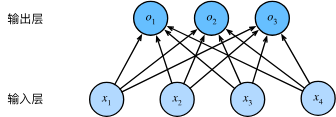
图3.4.1 softmax回归是一种单层神经网络

为了更简洁地表达模型，我们仍然使用线性代数符号。
通过向量形式表达为$\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$，
这是一种更适合数学和编写代码的形式。
由此，我们已经将所有权重放到一个$3 \times 4$矩阵中。
对于给定数据样本的特征$\mathbf{x}$，
我们的输出是由权重与输入特征进行矩阵-向量乘法再加上偏置$\mathbf{b}$得到的。

### 全连接层的参数开销

正如我们将在后续章节中看到的，在深度学习中，全连接层无处不在。
然而，顾名思义，全连接层是“完全”连接的，可能有很多可学习的参数。
具体来说，对于任何具有$d$个输入和$q$个输出的全连接层，
参数开销为$\mathcal{O}(dq)$，这个数字在实践中可能高得令人望而却步。
幸运的是，将$d$个输入转换为$q$个输出的成本可以减少到$\mathcal{O}(\frac{dq}{n})$，
其中超参数$n$可以由我们灵活指定，以在实际应用中平衡参数节约和模型有效性([Zhang et al., 2021](#paper.Zhang.2021))。
> - <span id='paper.Zhang.2021'></span> Zhang, A., Tay, Y., Zhang, S., Chan, A., Luu, A. T., Hui, S. C., & Fu, J. (2021). **Beyond fully-connected layers with quaternions: parameterization of hypercomplex multiplications with 1/n parameters**. International Conference on Learning Representations.

### softmax运算

现在我们将优化参数以最大化观测数据的概率。
为了得到预测结果，我们将设置一个阈值，如选择具有最大概率的标签。

我们希望模型的输出$\hat{y}_j$可以视为属于类$j$的概率，
然后选择具有最大输出值的类别$\operatorname*{argmax}_j y_j$作为我们的预测。
例如，如果$\hat{y}_1$、$\hat{y}_2$和$\hat{y}_3$分别为0.1、0.8和0.1，
那么我们预测的类别是2，在我们的例子中代表“鸡”。

然而我们能否将未规范化的预测$o$直接视作我们感兴趣的输出呢？
答案是否定的。
因为将线性层的输出直接视为概率时存在一些问题：
一方面，我们没有限制这些输出数字的总和为1。
另一方面，根据输入的不同，它们可以为负值。
这些违反了 :numref:`sec_prob`中所说的概率基本公理。

要将输出视为概率，我们必须保证在任何数据上的输出都是非负的且总和为1。
此外，我们需要一个训练的目标函数，来激励模型精准地估计概率。
例如，
在分类器输出0.5的所有样本中，我们希望这些样本是刚好有一半实际上属于预测的类别。
这个属性叫做*校准*（calibration）。

社会科学家邓肯·卢斯于1959年在*选择模型*（choice model）的理论基础上
发明的*softmax函数*正是这样做的：
softmax函数能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持
可导的性质。
为了完成这一目标，我们首先对每个未规范化的预测求幂，这样可以确保输出非负。
为了确保最终输出的概率值总和为1，我们再让每个求幂后的结果除以它们的总和。如下式：

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$
:eqlabel:`eq_softmax_y_and_o`

这里，对于所有的$j$总有$0 \leq \hat{y}_j \leq 1$。
因此，$\hat{\mathbf{y}}$可以视为一个正确的概率分布。
softmax运算不会改变未规范化的预测$\mathbf{o}$之间的大小次序，只会确定分配给每个类别的概率。
因此，在预测过程中，我们仍然可以用下式来选择最有可能的类别。

$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

尽管softmax是一个非线性函数，但softmax回归的输出仍然由输入特征的仿射变换决定。
因此，softmax回归是一个*线性模型*（linear model）。

### 小批量样本的矢量化
:label:`subsec_softmax_vectorization`

为了提高计算效率并且充分利用GPU，我们通常会对小批量样本的数据执行矢量计算。
假设我们读取了一个批量的样本$\mathbf{X}$，
其中特征维度（输入数量）为$d$，批量大小为$n$。
此外，假设我们在输出中有$q$个类别。
那么小批量样本的特征为$\mathbf{X} \in \mathbb{R}^{n \times d}$，
权重为$\mathbf{W} \in \mathbb{R}^{d \times q}$，
偏置为$\mathbf{b} \in \mathbb{R}^{1\times q}$。
softmax回归的矢量计算表达式为：

$$ \begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned} $$
:eqlabel:`eq_minibatch_softmax_reg`

相对于一次处理一个样本，
小批量样本的矢量化加快了$\mathbf{X}和\mathbf{W}$的矩阵-向量乘法。
由于$\mathbf{X}$中的每一行代表一个数据样本，
那么softmax运算可以*按行*（rowwise）执行：
对于$\mathbf{O}$的每一行，我们先对所有项进行幂运算，然后通过求和对它们进行标准化。
在 :eqref:`eq_minibatch_softmax_reg`中，
$\mathbf{X} \mathbf{W} + \mathbf{b}$的求和会使用广播机制，
小批量的未规范化预测$\mathbf{O}$和输出概率$\hat{\mathbf{Y}}$
都是形状为$n \times q$的矩阵。

### 损失函数

接下来，我们需要一个损失函数来度量预测的效果。
我们将使用最大似然估计，这与在线性回归
（ :numref:`subsec_normal_distribution_and_squared_loss`）
中的方法相同。

#### 对数似然

softmax函数给出了一个向量$\hat{\mathbf{y}}$，
我们可以将其视为“对给定任意输入$\mathbf{x}$的每个类的条件概率”。
例如，$\hat{y}_1$=$P(y=\text{猫} \mid \mathbf{x})$。
假设整个数据集$\{\mathbf{X}, \mathbf{Y}\}$具有$n$个样本，
其中索引$i$的样本由特征向量$\mathbf{x}^{(i)}$和独热标签向量$\mathbf{y}^{(i)}$组成。
我们可以将估计值与实际值进行比较：

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

其中，对于任何标签$\mathbf{y}$和模型预测$\hat{\mathbf{y}}$，损失函数为：

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$
:eqlabel:`eq_l_cross_entropy`

在本节稍后的内容会讲到， :eqref:`eq_l_cross_entropy`中的损失函数
通常被称为*交叉熵损失*（cross-entropy loss）。
由于$\mathbf{y}$是一个长度为$q$的独热编码向量，
所以除了一个项以外的所有项$j$都消失了。
由于所有$\hat{y}_j$都是预测的概率，所以它们的对数永远不会大于$0$。
因此，如果正确地预测实际标签，即如果实际标签$P(\mathbf{y} \mid \mathbf{x})=1$，
则损失函数不能进一步最小化。
注意，这往往是不可能的。
例如，数据集中可能存在标签噪声（比如某些样本可能被误标），
或输入特征没有足够的信息来完美地对每一个样本分类。

#### softmax及其导数

由于softmax和相关的损失函数很常见，
因此我们需要更好地理解它的计算方式。
将 :eqref:`eq_softmax_y_and_o`代入损失 :eqref:`eq_l_cross_entropy`中。
利用softmax的定义，我们得到：

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

考虑相对于任何未规范化的预测$o_j$的导数，我们得到：

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

换句话说，导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异。
从这个意义上讲，这与我们在回归中看到的非常相似，
其中梯度是观测值$y$和估计值$\hat{y}$之间的差异。
这不是巧合，在任何指数族分布模型中
（参见[本书附录中关于数学分布的一节](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/distributions.html)），
对数似然的梯度正是由此得出的。
这使梯度计算在实践中变得容易很多。

#### 交叉熵损失

现在让我们考虑整个结果分布的情况，即观察到的不仅仅是一个结果。
对于标签$\mathbf{y}$，我们可以使用与以前相同的表示形式。
唯一的区别是，我们现在用一个概率向量表示，如$(0.1, 0.2, 0.7)$，
而不是仅包含二元项的向量$(0, 0, 1)$。
我们使用 :eqref:`eq_l_cross_entropy`来定义损失$l$，
它是所有标签分布的预期损失值。
此损失称为*交叉熵损失*（cross-entropy loss），它是分类问题最常用的损失之一。
本节我们将通过介绍信息论基础来理解交叉熵损失。
如果想了解更多信息论的细节，请进一步参考
[本书附录中关于信息论的一节](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/information-theory.html)。

### 信息论基础

*信息论*（information theory）涉及编码、解码、发送以及尽可能简洁地处理信息或数据。

#### 熵

信息论的核心思想是量化数据中的信息内容。
在信息论中，该数值被称为分布$P$的*熵*（entropy）。可以通过以下方程得到：

$$H[P] = \sum_j - P(j) \log P(j).$$
:eqlabel:`eq_softmax_reg_entropy`

信息论的基本定理之一指出，为了对从分布$p$中随机抽取的数据进行编码，
我们至少需要$H[P]$“纳特（nat）”对其进行编码。
“纳特”相当于*比特*（bit），但是对数底为$e$而不是2。因此，一个纳特是$\frac{1}{\log(2)} \approx 1.44$比特。

#### 信息量

压缩与预测有什么关系呢？
想象一下，我们有一个要压缩的数据流。
如果我们很容易预测下一个数据，那么这个数据就很容易压缩。
为什么呢？
举一个极端的例子，假如数据流中的每个数据完全相同，这会是一个非常无聊的数据流。
由于它们总是相同的，我们总是知道下一个数据是什么。
所以，为了传递数据流的内容，我们不必传输任何信息。也就是说，“下一个数据是xx”这个事件毫无信息量。

但是，如果我们不能完全预测每一个事件，那么我们有时可能会感到"惊异"。
克劳德·香农决定用信息量$\log \frac{1}{P(j)} = -\log P(j)$来量化这种惊异程度。
在观察一个事件$j$时，并赋予它（主观）概率$P(j)$。
当我们赋予一个事件较低的概率时，我们的惊异会更大，该事件的信息量也就更大。
在 :eqref:`eq_softmax_reg_entropy`中定义的熵，
是当分配的概率真正匹配数据生成过程时的*信息量的期望*。

#### 重新审视交叉熵

如果把熵$H(P)$想象为“知道真实概率的人所经历的惊异程度”，那么什么是交叉熵？
交叉熵*从*$P$*到*$Q$，记为$H(P, Q)$。
我们可以把交叉熵想象为“主观概率为$Q$的观察者在看到根据概率$P$生成的数据时的预期惊异”。
当$P=Q$时，交叉熵达到最低。
在这种情况下，从$P$到$Q$的交叉熵是$H(P, P)= H(P)$。

简而言之，我们可以从两方面来考虑交叉熵分类目标：
（i）最大化观测数据的似然；（ii）最小化传达标签所需的惊异。

### 模型预测和评估

在训练softmax回归模型后，给出任何样本特征，我们可以预测每个输出类别的概率。
通常我们使用预测概率最高的类别作为输出类别。
如果预测与实际类别（标签）一致，则预测是正确的。
在接下来的实验中，我们将使用*精度*（accuracy）来评估模型的性能。
精度等于正确预测数与预测总数之间的比率。

### 小结

* softmax运算获取一个向量并将其映射为概率。
* softmax回归适用于分类问题，它使用了softmax运算中输出类别的概率分布。
* 交叉熵是一个衡量两个概率分布之间差异的很好的度量，它测量给定模型编码数据所需的比特数。

## 图像分类数据集

(**MNIST数据集**) :cite:`LeCun.Bottou.Bengio.ea.1998`
(**是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。
我们将使用类似但更复杂的Fashion-MNIST数据集**) :cite:`Xiao.Rasul.Vollgraf.2017`。

In [ ]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import gluon
import sys

d2l.use_svg_display()

In [ ]:
#@tab pytorch
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision import transforms
from torch.utils import data

d2l.use_svg_display()

In [ ]:
#@tab tensorflow
%matplotlib inline
from d2l import tensorflow as d2l
import tensorflow as tf

d2l.use_svg_display()

In [ ]:
#@tab paddle
%matplotlib inline
from d2l import paddle as d2l
import warnings
warnings.filterwarnings("ignore")
import sys
import paddle
from paddle.vision import transforms

d2l.use_svg_display()

### 读取数据集

我们可以[**通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中**]。

In [ ]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test = gluon.data.vision.FashionMNIST(train=False)

In [ ]:
#@tab pytorch
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [ ]:
#@tab tensorflow
mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
#@tab paddle
trans = transforms.ToTensor()
mnist_train = paddle.vision.datasets.FashionMNIST(mode="train",
                                                  transform=trans)
mnist_test = paddle.vision.datasets.FashionMNIST(mode="test", transform=trans)

Fashion-MNIST由10个类别的图像组成，
每个类别由*训练数据集*（train dataset）中的6000张图像
和*测试数据集*（test dataset）中的1000张图像组成。
因此，训练集和测试集分别包含60000和10000张图像。
测试数据集不会用于训练，只用于评估模型性能。

In [ ]:
#@tab mxnet, pytorch, paddle
len(mnist_train), len(mnist_test)

In [ ]:
#@tab tensorflow
len(mnist_train[0]), len(mnist_test[0])

每个输入图像的高度和宽度均为28像素。
数据集由灰度图像组成，其通道数为1。
为了简洁起见，本书将高度$h$像素、宽度$w$像素图像的形状记为$h \times w$或（$h$,$w$）。

In [ ]:
#@tab all
mnist_train[0][0].shape

[~~两个可视化数据集的函数~~]

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。
以下函数用于在数字标签索引及其文本名称之间进行转换。

In [ ]:
#@tab all
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

我们现在可以创建一个函数来可视化这些样本。

In [ ]:
#@tab mxnet, tensorflow
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(d2l.numpy(img))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [ ]:
#@tab pytorch
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [ ]:
#@tab paddle
#@save
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if paddle.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

以下是训练数据集中前[**几个样本的图像及其相应的标签**]。

In [ ]:
X, y = mnist_train[:18]

print(X.shape)
show_images(X.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(y));

In [ ]:
#@tab pytorch
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [ ]:
#@tab tensorflow
X = tf.constant(mnist_train[0][:18])
y = tf.constant(mnist_train[1][:18])
show_images(X, 2, 9, titles=get_fashion_mnist_labels(y));

In [ ]:
#@tab paddle
X, y = next(iter(paddle.io.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape([18, 28, 28]), 2, 9, titles=get_fashion_mnist_labels(y));

### 读取小批量

为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。
回顾一下，在每次迭代中，数据加载器每次都会[**读取一小批量数据，大小为`batch_size`**]。
通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [ ]:
batch_size = 256

def get_dataloader_workers():  #@save
    """在非Windows的平台上，使用4个进程来读取数据"""
    return 0 if sys.platform.startswith('win') else 4

# 通过ToTensor实例将图像数据从uint8格式变换成32位浮点数格式，并除以255使得所有像素的数值
# 均在0～1之间
transformer = gluon.data.vision.transforms.ToTensor()
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer),
                                   batch_size, shuffle=True,
                                   num_workers=get_dataloader_workers())

In [ ]:
#@tab pytorch
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [ ]:
#@tab tensorflow
batch_size = 256
train_iter = tf.data.Dataset.from_tensor_slices(
    mnist_train).batch(batch_size).shuffle(len(mnist_train[0]))

In [ ]:
#@tab paddle
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = paddle.io.DataLoader(dataset=mnist_train,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  return_list=True,
                                  num_workers=get_dataloader_workers())

我们看一下读取训练数据所需的时间。

In [ ]:
#@tab all
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

### 整合所有组件

现在我们[**定义`load_data_fashion_mnist`函数**]，用于获取和读取Fashion-MNIST数据集。
这个函数返回训练集和验证集的数据迭代器。
此外，这个函数还接受一个可选参数`resize`，用来将图像大小调整为另一种形状。

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    dataset = gluon.data.vision
    trans = [dataset.transforms.ToTensor()]
    if resize:
        trans.insert(0, dataset.transforms.Resize(resize))
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                  num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                  num_workers=get_dataloader_workers()))

In [ ]:
#@tab pytorch
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [ ]:
#@tab tensorflow
def load_data_fashion_mnist(batch_size, resize=None):   #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()
    # 将所有数字除以255，使所有像素值介于0和1之间，在最后添加一个批处理维度，
    # 并将标签转换为int32。
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                            tf.cast(y, dtype='int32'))
    resize_fn = lambda X, y: (
        tf.image.resize_with_pad(X, resize, resize) if resize else X, y)
    return (
        tf.data.Dataset.from_tensor_slices(process(*mnist_train)).batch(
            batch_size).shuffle(len(mnist_train[0])).map(resize_fn),
        tf.data.Dataset.from_tensor_slices(process(*mnist_test)).batch(
            batch_size).map(resize_fn))

In [ ]:
#@tab paddle
#@save
def load_data_fashion_mnist(batch_size, resize=None):  
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = paddle.vision.datasets.FashionMNIST(mode="train",
                                                      transform=trans)
    mnist_test = paddle.vision.datasets.FashionMNIST(mode="test",
                                                     transform=trans)
    return (paddle.io.DataLoader(dataset=mnist_train,
                                 batch_size=batch_size,
                                 shuffle=True,
                                 return_list=True,
                                 num_workers=get_dataloader_workers()),
            paddle.io.DataLoader(dataset=mnist_test,
                                 batch_size=batch_size,
                                 return_list=True,
                                 shuffle=True,
                                 num_workers=get_dataloader_workers()))

下面，我们通过指定`resize`参数来测试`load_data_fashion_mnist`函数的图像大小调整功能。

In [ ]:
#@tab all
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

我们现在已经准备好使用Fashion-MNIST数据集，便于下面的章节调用来评估各种分类算法。

### 小结

* Fashion-MNIST是一个服装分类数据集，由10个类别的图像组成。我们将在后续章节中使用此数据集来评估各种分类算法。
* 我们将高度$h$像素，宽度$w$像素图像的形状记为$h \times w$或（$h$,$w$）。
* 数据迭代器是获得更高性能的关键组件。依靠实现良好的数据迭代器，利用高性能计算来避免减慢训练过程。

## softmax回归的从零开始实现

(**就像我们从零开始实现线性回归一样，**)
我们认为softmax回归也是重要的基础，因此(**应该知道实现softmax回归的细节**)。
本节我们将使用刚刚在 :numref:`sec_fashion_mnist`中引入的Fashion-MNIST数据集，
并设置数据迭代器的批量大小为256。

In [ ]:
from d2l import mxnet as d2l
from mxnet import autograd, np, npx, gluon
from IPython import display
npx.set_np()

In [ ]:
#@tab pytorch
from d2l import torch as d2l
import torch
from IPython import display

In [ ]:
#@tab tensorflow
from d2l import tensorflow as d2l
import tensorflow as tf
from IPython import display

In [ ]:
#@tab paddle
from d2l import paddle as d2l
import warnings
warnings.filterwarnings("ignore")
import paddle
from IPython import display

In [ ]:
#@tab all
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

和之前线性回归的例子一样，这里的每个样本都将用固定长度的向量表示。
原始数据集中的每个样本都是$28 \times 28$的图像。
本节[**将展平每个图像，把它们看作长度为784的向量。**]
在后面的章节中，我们将讨论能够利用图像空间结构的特征，
但现在我们暂时只把每个像素位置看作一个特征。

回想一下，在softmax回归中，我们的输出与类别一样多。
(**因为我们的数据集有10个类别，所以网络输出维度为10**)。
因此，权重将构成一个$784 \times 10$的矩阵，
偏置将构成一个$1 \times 10$的行向量。
与线性回归一样，我们将使用正态分布初始化我们的权重`W`，偏置初始化为0。

In [ ]:
num_inputs = 784
num_outputs = 10

W = np.random.normal(0, 0.01, (num_inputs, num_outputs))
b = np.zeros(num_outputs)
W.attach_grad()
b.attach_grad()

In [ ]:
#@tab pytorch
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [ ]:
#@tab tensorflow
num_inputs = 784
num_outputs = 10

W = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs),
                                 mean=0, stddev=0.01))
b = tf.Variable(tf.zeros(num_outputs))

In [ ]:
#@tab paddle
num_inputs = 784
num_outputs = 10

W = paddle.normal(0, 0.01, shape=(num_inputs, num_outputs))
b = paddle.zeros(shape=(num_outputs,))
W.stop_gradient=False
b.stop_gradient=False

### 定义softmax操作

在实现softmax回归模型之前，我们简要回顾一下`sum`运算符如何沿着张量中的特定维度工作。
如 :numref:`subseq_lin-alg-reduction`和
 :numref:`subseq_lin-alg-non-reduction`所述，
 [**给定一个矩阵`X`，我们可以对所有元素求和**]（默认情况下）。
 也可以只求同一个轴上的元素，即同一列（轴0）或同一行（轴1）。
 如果`X`是一个形状为`(2, 3)`的张量，我们对列进行求和，
 则结果将是一个具有形状`(3,)`的向量。
 当调用`sum`运算符时，我们可以指定保持在原始张量的轴数，而不折叠求和的维度。
 这将产生一个具有形状`(1, 3)`的二维张量。

In [ ]:
#@tab pytorch, paddle
X = d2l.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
d2l.reduce_sum(X, 0, keepdim=True), d2l.reduce_sum(X, 1, keepdim=True)

In [ ]:
#@tab mxnet, tensorflow
X = d2l.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
d2l.reduce_sum(X, 0, keepdims=True), d2l.reduce_sum(X, 1, keepdims=True)

回想一下，[**实现softmax**]由三个步骤组成：

1. 对每个项求幂（使用`exp`）；
1. 对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；
1. 将每一行除以其规范化常数，确保结果的和为1。

在查看代码之前，我们回顾一下这个表达式：

(**
$$
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.
$$
**)

分母或规范化常数，有时也称为*配分函数*（其对数称为对数-配分函数）。
该名称来自[统计物理学](https://en.wikipedia.org/wiki/Partition_function_(statistical_mechanics))中一个模拟粒子群分布的方程。

In [ ]:
#@tab mxnet, tensorflow
def softmax(X):
    X_exp = d2l.exp(X)
    partition = d2l.reduce_sum(X_exp, 1, keepdims=True)
    return X_exp / partition  # 这里应用了广播机制

In [ ]:
#@tab pytorch, paddle
def softmax(X):
    X_exp = d2l.exp(X)
    partition = d2l.reduce_sum(X_exp, 1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

正如上述代码，对于任何随机输入，[**我们将每个元素变成一个非负数。
此外，依据概率原理，每行总和为1**]。

In [ ]:
#@tab mxnet, pytorch, paddle
X = d2l.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, d2l.reduce_sum(X_prob, 1)

In [ ]:
#@tab tensorflow
X = tf.random.normal((2, 5), 0, 1)
X_prob = softmax(X)
X_prob, tf.reduce_sum(X_prob, 1)

注意，虽然这在数学上看起来是正确的，但我们在代码实现中有点草率。
矩阵中的非常大或非常小的元素可能造成数值上溢或下溢，但我们没有采取措施来防止这点。

### 定义模型

定义softmax操作后，我们可以[**实现softmax回归模型**]。
下面的代码定义了输入如何通过网络映射到输出。
注意，将数据传递到模型之前，我们使用`reshape`函数将每张原始图像展平为向量。

In [ ]:
#@tab all
def net(X):
    return softmax(d2l.matmul(d2l.reshape(X, (-1, W.shape[0])), W) + b)

### 定义损失函数

接下来，我们实现 :numref:`sec_softmax`中引入的交叉熵损失函数。
这可能是深度学习中最常见的损失函数，因为目前分类问题的数量远远超过回归问题的数量。

回顾一下，交叉熵采用真实标签的预测概率的负对数似然。
这里我们不使用Python的for循环迭代预测（这往往是低效的），
而是通过一个运算符选择所有元素。
下面，我们[**创建一个数据样本`y_hat`，其中包含2个样本在3个类别的预测概率，
以及它们对应的标签`y`。**]
有了`y`，我们知道在第一个样本中，第一类是正确的预测；
而在第二个样本中，第三类是正确的预测。
然后(**使用`y`作为`y_hat`中概率的索引**)，
我们选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。

In [ ]:
#@tab mxnet, pytorch, paddle
y = d2l.tensor([0, 2])
y_hat = d2l.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

In [ ]:
#@tab tensorflow
y_hat = tf.constant([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = tf.constant([0, 2])
tf.boolean_mask(y_hat, tf.one_hot(y, depth=y_hat.shape[-1]))

现在我们只需一行代码就可以[**实现交叉熵损失函数**]。

In [ ]:
#@tab mxnet, pytorch
def cross_entropy(y_hat, y):
    return - d2l.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

In [ ]:
#@tab tensorflow
def cross_entropy(y_hat, y):
    return -tf.math.log(tf.boolean_mask(
        y_hat, tf.one_hot(y, depth=y_hat.shape[-1])))

cross_entropy(y_hat, y)

In [ ]:
#@tab paddle
def cross_entropy(y_hat, y):
    return - paddle.log(y_hat[[i for i in range(len(y_hat))], y.squeeze()])

cross_entropy(y_hat, y)

### 分类精度

给定预测概率分布`y_hat`，当我们必须输出硬预测（hard prediction）时，
我们通常选择预测概率最高的类。
许多应用都要求我们做出选择。如Gmail必须将电子邮件分类为“Primary（主要邮件）”、
“Social（社交邮件）”“Updates（更新邮件）”或“Forums（论坛邮件）”。
Gmail做分类时可能在内部估计概率，但最终它必须在类中选择一个。

当预测与标签分类`y`一致时，即是正确的。
分类精度即正确预测数量与总预测数量之比。
虽然直接优化精度可能很困难（因为精度的计算不可导），
但精度通常是我们最关心的性能衡量标准，我们在训练分类器时几乎总会关注它。

为了计算精度，我们执行以下操作。
首先，如果`y_hat`是矩阵，那么假定第二个维度存储每个类的预测分数。
我们使用`argmax`获得每行中最大元素的索引来获得预测类别。
然后我们[**将预测类别与真实`y`元素进行比较**]。
由于等式运算符“`==`”对数据类型很敏感，
因此我们将`y_hat`的数据类型转换为与`y`的数据类型一致。
结果是一个包含0（错）和1（对）的张量。
最后，我们求和会得到正确预测的数量。

In [ ]:
#@tab all
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = d2l.argmax(y_hat, axis=1)
    cmp = d2l.astype(y_hat, y.dtype) == y
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))

In [ ]:
#@tab paddle
#@save
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    if len(y_hat.shape) < len(y.shape):
        cmp = y_hat.astype(y.dtype) == y.squeeze()
    else:
        cmp = y_hat.astype(y.dtype) == y
    return float(cmp.astype(y.dtype).sum())

我们将继续使用之前定义的变量`y_hat`和`y`分别作为预测的概率分布和标签。
可以看到，第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。
第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致。
因此，这两个样本的分类精度率为0.5。

In [ ]:
#@tab all
accuracy(y_hat, y) / len(y)

同样，对于任意数据迭代器`data_iter`可访问的数据集，
[**我们可以评估在任意模型`net`的精度**]。

In [ ]:
#@tab mxnet, tensorflow
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    metric = Accumulator(2)  # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]

In [ ]:
#@tab pytorch
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]

In [ ]:
#@tab paddle
#@save
def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度"""
    if isinstance(net, paddle.nn.Layer):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with paddle.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]

这里定义一个实用程序类`Accumulator`，用于对多个变量进行累加。
在上面的`evaluate_accuracy`函数中，
我们在(**`Accumulator`实例中创建了2个变量，
分别用于存储正确预测的数量和预测的总数量**)。
当我们遍历数据集时，两者都将随着时间的推移而累加。

In [ ]:
#@tab all
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

由于我们使用随机权重初始化`net`模型，
因此该模型的精度应接近于随机猜测。
例如在有10个类别情况下的精度为0.1。

In [ ]:
#@tab all
evaluate_accuracy(net, test_iter)

### 训练

在我们看过 :numref:`sec_linear_scratch`中的线性回归实现，
[**softmax回归的训练**]过程代码应该看起来非常眼熟。
在这里，我们重构训练过程的实现以使其可重复使用。
首先，我们定义一个函数来训练一个迭代周期。
请注意，`updater`是更新模型参数的常用函数，它接受批量大小作为参数。
它可以是`d2l.sgd`函数，也可以是框架的内置优化函数。

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    if isinstance(updater, gluon.Trainer):
        updater = updater.step
    for X, y in train_iter:
        # 计算梯度并更新参数
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y)
        l.backward()
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.size)
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
#@tab pytorch
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
#@tab tensorflow
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        with tf.GradientTape() as tape:
            y_hat = net(X)
            # Keras内置的损失接受的是（标签，预测），这不同于用户在本书中的实现。
            # 本书的实现接受（预测，标签），例如我们上面实现的“交叉熵”
            if isinstance(loss, tf.keras.losses.Loss):
                l = loss(y, y_hat)
            else:
                l = loss(y_hat, y)
        if isinstance(updater, tf.keras.optimizers.Optimizer):
            params = net.trainable_variables
            grads = tape.gradient(l, params)
            updater.apply_gradients(zip(grads, params))
        else:
            updater(X.shape[0], tape.gradient(l, updater.params))
        # Keras的loss默认返回一个批量的平均损失
        l_sum = l * float(tf.size(y)) if isinstance(
            loss, tf.keras.losses.Loss) else tf.reduce_sum(l)
        metric.add(l_sum, accuracy(y_hat, y), tf.size(y))
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
#@tab paddle
#@save
def train_epoch_ch3(net, train_iter, loss, updater):
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, paddle.nn.Layer):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)

    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, paddle.optimizer.Optimizer):
            # 使用PaddlePaddle内置的优化器和损失函数
            updater.clear_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

在展示训练函数的实现之前，我们[**定义一个在动画中绘制数据的实用程序类**]`Animator`，
它能够简化本书其余部分的代码。

In [ ]:
#@tab all
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

接下来我们实现一个[**训练函数**]，
它会在`train_iter`访问到的训练数据集上训练一个模型`net`。
该训练函数将会运行多个迭代周期（由`num_epochs`指定）。
在每个迭代周期结束时，利用`test_iter`访问到的测试数据集对模型进行评估。
我们将利用`Animator`类来可视化训练进度。

In [ ]:
#@tab all
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

作为一个从零开始的实现，我们使用 :numref:`sec_linear_scratch`中定义的
[**小批量随机梯度下降来优化模型的损失函数**]，设置学习率为0.1。

In [ ]:
#@tab mxnet, pytorch, paddle
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

In [ ]:
#@tab tensorflow
class Updater():  #@save
    """用小批量随机梯度下降法更新参数"""
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr

    def __call__(self, batch_size, grads):
        d2l.sgd(self.params, grads, self.lr, batch_size)

updater = Updater([W, b], lr=0.1)

现在，我们[**训练模型10个迭代周期**]。
请注意，迭代周期（`num_epochs`）和学习率（`lr`）都是可调节的超参数。
通过更改它们的值，我们可以提高模型的分类精度。

In [ ]:
#@tab all
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### 预测

现在训练已经完成，我们的模型已经准备好[**对图像进行分类预测**]。
给定一系列图像，我们将比较它们的实际标签（文本输出的第一行）和模型预测（文本输出的第二行）。

In [ ]:
#@tab all
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(d2l.argmax(net(X), axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        d2l.reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

### 小结

* 借助softmax回归，我们可以训练多分类的模型。
* 训练softmax回归循环模型与训练线性回归模型非常相似：先读取数据，再定义模型和损失函数，然后使用优化算法训练模型。大多数常见的深度学习模型都有类似的训练过程。

## softmax回归的简洁实现

在 :numref:`sec_linear_concise`中，
我们发现(**通过深度学习框架的高级API能够使实现**)
(~~softmax~~)
线性(**回归变得更加容易**)。
同样，通过深度学习框架的高级API也能更方便地实现softmax回归模型。
本节如在 :numref:`sec_softmax_scratch`中一样，
继续使用Fashion-MNIST数据集，并保持批量大小为256。

In [ ]:
from d2l import mxnet as d2l
from mxnet import gluon, init, npx
from mxnet.gluon import nn
npx.set_np()

In [ ]:
#@tab pytorch
from d2l import torch as d2l
import torch
from torch import nn

In [ ]:
#@tab tensorflow
from d2l import tensorflow as d2l
import tensorflow as tf

In [ ]:
#@tab paddle
from d2l import paddle as d2l
import warnings
warnings.filterwarnings("ignore")
import paddle
from paddle import nn

In [ ]:
#@tab all
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

如我们在 :numref:`sec_softmax`所述，
[**softmax回归的输出层是一个全连接层**]。
因此，为了实现我们的模型，
我们只需在`Sequential`中添加一个带有10个输出的全连接层。
同样，在这里`Sequential`并不是必要的，
但它是实现深度模型的基础。
我们仍然以均值0和标准差0.01随机初始化权重。

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [ ]:
#@tab pytorch
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [ ]:
#@tab tensorflow
net = tf.keras.models.Sequential()
net.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
weight_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
net.add(tf.keras.layers.Dense(10, kernel_initializer=weight_initializer))

In [ ]:
#@tab paddle
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.initializer.Normal(m.weight, std=0.01)

net.apply(init_weights);

### 重新审视Softmax的实现
:label:`subsec_softmax-implementation-revisited`

在前面 :numref:`sec_softmax_scratch`的例子中，
我们计算了模型的输出，然后将此输出送入交叉熵损失。
从数学上讲，这是一件完全合理的事情。
然而，从计算角度来看，指数可能会造成数值稳定性问题。

回想一下，softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，
其中$\hat y_j$是预测的概率分布。
$o_j$是未规范化的预测$\mathbf{o}$的第$j$个元素。
如果$o_k$中的一些数值非常大，
那么$\exp(o_k)$可能大于数据类型容许的最大数字，即*上溢*（overflow）。
这将使分母或分子变为`inf`（无穷大），
最后得到的是0、`inf`或`nan`（不是数字）的$\hat y_j$。
在这些情况下，我们无法得到一个明确定义的交叉熵值。

解决这个问题的一个技巧是：
在继续softmax计算之前，先从所有$o_k$中减去$\max(o_k)$。
这里可以看到每个$o_k$按常数进行的移动不会改变softmax的返回值：

$$
\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}
$$


在减法和规范化步骤之后，可能有些$o_j - \max(o_k)$具有较大的负值。
由于精度受限，$\exp(o_j - \max(o_k))$将有接近零的值，即*下溢*（underflow）。
这些值可能会四舍五入为零，使$\hat y_j$为零，
并且使得$\log(\hat y_j)$的值为`-inf`。
反向传播几步后，我们可能会发现自己面对一屏幕可怕的`nan`结果。

尽管我们要计算指数函数，但我们最终在计算交叉熵损失时会取它们的对数。
通过将softmax和交叉熵结合在一起，可以避免反向传播过程中可能会困扰我们的数值稳定性问题。
如下面的等式所示，我们避免计算$\exp(o_j - \max(o_k))$，
而可以直接使用$o_j - \max(o_k)$，因为$\log(\exp(\cdot))$被抵消了。

$$
\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}\right) \\
& = \log{(\exp(o_j - \max(o_k)))}-\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)} \\
& = o_j - \max(o_k) -\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)}.
\end{aligned}
$$

我们也希望保留传统的softmax函数，以备我们需要评估通过模型输出的概率。
但是，我们没有将softmax概率传递到损失函数中，
而是[**在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数**]，
这是一种类似["LogSumExp技巧"](https://en.wikipedia.org/wiki/LogSumExp)的聪明方式。

In [ ]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
#@tab pytorch, paddle
loss = nn.CrossEntropyLoss(reduction='none')

In [ ]:
#@tab tensorflow
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### 优化算法

在这里，我们(**使用学习率为0.1的小批量随机梯度下降作为优化算法**)。
这与我们在线性回归例子中的相同，这说明了优化器的普适性。

In [ ]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [ ]:
#@tab pytorch
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

In [ ]:
#@tab tensorflow
trainer = tf.keras.optimizers.SGD(learning_rate=.1)

In [ ]:
#@tab paddle
trainer = paddle.optimizer.SGD(learning_rate=0.1, parameters=net.parameters())

### 训练

接下来我们[**调用**] :numref:`sec_softmax_scratch`中(~~之前~~)
(**定义的训练函数来训练模型**)。

In [ ]:
#@tab all
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

和以前一样，这个算法使结果收敛到一个相当高的精度，而且这次的代码比之前更精简了。

### 小结

* 使用深度学习框架的高级API，我们可以更简洁地实现softmax回归。
* 从计算的角度来看，实现softmax回归比较复杂。在许多情况下，深度学习框架在这些著名的技巧之外采取了额外的预防措施，来确保数值的稳定性。这使我们避免了在实践中从零开始编写模型时可能遇到的陷阱。